In [31]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')
from functions.select_cols_functions import *
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [32]:
source_file = 'train'

In [33]:
df = pd.read_csv(f'../../data/{source_file}.csv')

In [34]:
def is_named(row):
    # Lista de palavras-chave que indicam um nome genérico
    keywords = ['no name', 'no name yet', 'no names yet', 'unknown', 'nameless', 'siblings', 'breed', 'kitten', 'kittens', 'kitties', 'puppy', 'puppies', 'pup', 'pups',  'adoption', 'cute', 'nameless', 'unknown', 'dog', 'cat', 'kittens', 'boy', 'girl', 'female', 'male', 'little', '1', '2', '3', '4', '5', '6', '7', '8', '9']

    name = str(row['Name']).lower().strip()  # Convertendo para lowercase para padronizar
    if pd.isna(row['Name']) or name == '':   # Se o nome for NaN ou vazio
        return False

    return not any(re.search(r'\b' + re.escape(keyword.lower()) + r'\b', name) for keyword in keywords)

In [35]:
def feature_engineering(df):
    adoption_speed = df.pop('AdoptionSpeed')
    df['isNamed'] = df.apply(is_named, axis=1)
    df['AdoptionSpeed'] = adoption_speed
    return df

In [36]:
df = feature_engineering(df)
df[['Name', 'isNamed']].to_csv('./isNamed.csv', index=False)

C:\Users\lucas\AppData\Local\Temp\ipykernel_18440\2393799557.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isNamed', data=df, palette=['salmon', 'skyblue'])


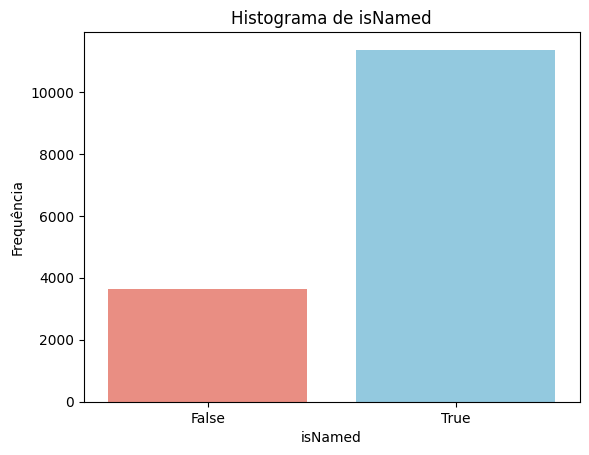

In [37]:
sns.countplot(x='isNamed', data=df, palette=['salmon', 'skyblue'])
plt.title('Histograma de isNamed')
plt.xlabel('isNamed')
plt.ylabel('Frequência')
plt.xticks([0, 1], ['False', 'True'])  # Definindo os rótulos do eixo x
plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_18440\2509131438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isNamed', y='AdoptionSpeed', data=df, palette=['salmon', 'skyblue'])


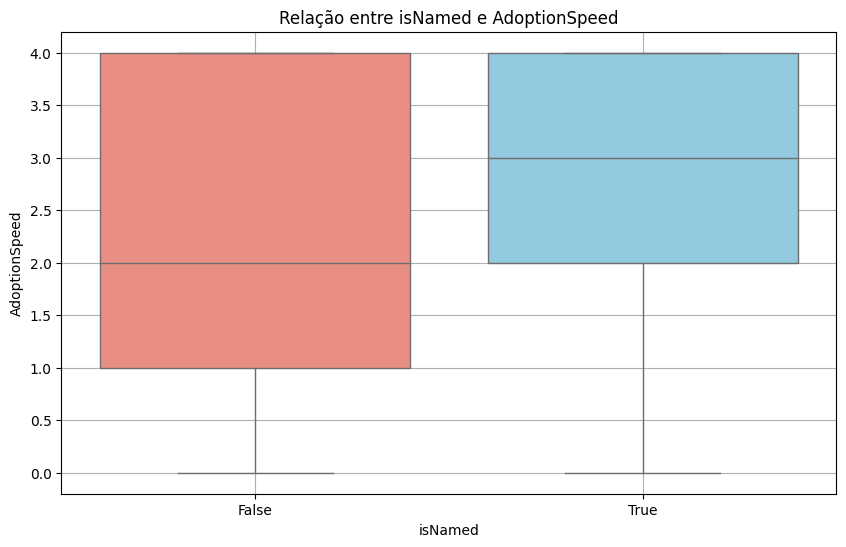

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isNamed', y='AdoptionSpeed', data=df, palette=['salmon', 'skyblue'])
plt.title('Relação entre isNamed e AdoptionSpeed')
plt.xlabel('isNamed')
plt.ylabel('AdoptionSpeed')
plt.xticks([0, 1], ['False', 'True'])  # Definindo os rótulos do eixo x
plt.grid(True)
plt.show()

In [39]:
df.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'isNamed',
       'AdoptionSpeed'],
      dtype='object')

In [40]:
df.to_csv('../../data/feature_engineering.csv', index=False)